After testing Decision Trees and obtaining promising results, we now move to Random Forest, an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting. Random Forest is well-suited for our project because it can handle both categorical and numerical features, capture complex relationships, and provide more robust and stable predictions. The goal is to build a stronger classifier for socioeconomic strata by leveraging the power of multiple trees working together, thus achieving higher accuracy and generalizability.

In [4]:
# Basic library importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

The dataframe we are going to work with will be the same one we prepared to apply the decision trees algorithm. As a reminder, this dataset has already been processed and is ready to use. The variables that were originally categorical have been processed using one-hot encoding.

In [5]:
# Import dataframe
df = pd.read_csv('df_randomforest')
df.drop('Unnamed: 0', axis=1,inplace=True)
df

,folioviv,foliohog_x,ingreso_promedio,poca_variedad_alimentos,alimentacion_cereales,alimentacion_carne,alimentacion_huevo,alimentacion_pescado,telefono,celular,conex_inte,num_auto,tarjeta,pagotarjet,negcua,est_alim,est_trans,numren,edad_promedio,alfabetism,asis_esc,num_trabaj,discapacidad,num_cuarto,total_dispositivos,est_socio,tipo_viv_1,tipo_viv_2,tipo_viv_3,tipo_viv_4,tipo_viv_5,tipo_viv_6,tipo_viv_7,mat_pared_1,mat_pared_2,mat_pared_3,mat_pared_4,mat_pared_5,mat_pared_6,mat_pared_7,mat_pared_8,mat_pisos_1,mat_pisos_2,mat_pisos_3,ab_agua_1,ab_agua_2,ab_agua_3,ab_agua_4,ab_agua_5,ab_agua_6,disp_elect_1,disp_elect_2,disp_elect_3,disp_elect_4,disp_elect_5,entidad_x_1,entidad_x_2,entidad_x_3,entidad_x_4,entidad_x_5,entidad_x_6,entidad_x_7,entidad_x_8,entidad_x_9,entidad_x_10,entidad_x_11,entidad_x_12,entidad_x_13,entidad_x_14,entidad_x_15,entidad_x_16,entidad_x_17,entidad_x_18,entidad_x_19,entidad_x_20,entidad_x_21,entidad_x_22,entidad_x_23,entidad_x_24,entidad_x_25,entidad_x_26,entidad_x_27,entidad_x_28,entidad_x_29,entidad_x_30,entidad_x_31,entidad_x_32
0,100001901,1,45546.670000,0,7,3,7,0,0,1,1,3,0,0,0,5100,0,4,16,1.0,4,4,4,4,6,Upper-middle stratum,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100001902,1,37666.670000,0,7,4,7,1,1,1,1,3,1,0,0,12000,0,4,34,1.0,4,4,4,4,6,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100001904,1,19083.330000,1,7,7,7,0,1,1,1,3,0,0,0,4350,0,2,44,1.0,2,2,2,3,6,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100001905,1,35700.000000,0,7,4,7,0,1,1,1,3,1,1,0,8000,0,4,28,1.0,4,4,4,3,7,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100002501,1,43088.000000,0,7,3,3,2,1,1,1,1,1,0,0,12000,2000,4,19,1.0,4,4,4,3,4,Lower-middle stratum,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182824,1906196675,1,73350.898434,0,7,4,6,2,0,1,1,3,1,0,0,9543,175,5,33,1.0,5,5,5,4,8,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
182825,1104006155,1,37596.111565,0,7,6,1,0,1,1,1,3,1,0,0,11448,0,5,25,1.0,5,5,5,4,7,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182826,2307502024,1,40875.684852,0,3,5,3,0,0,1,1,2,0,0,0,3922,672,2,63,1.0,2,2,2,3,6,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
182827,3200508979,1,35692.479585,0,7,3,2,0,0,1,1,3,1,0,0,2751,135,1,27,1.0,1,1,1,3,5,Upper-middle stratum,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Now we are going to prepare our X matrix, y vector, and our test and training sets so that we can apply the algorithm.

We will use the `RandomForestClassifier` module from sklearn and create 1,000 random trees. Finally, we will use the same metrics as in the previous exercise, where we will look at metrics such as precision, recall, f1, accuracy, among others.

In [7]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create rf object
rf = RandomForestClassifier(n_estimators = 1000, random_state=1)


feature_cols = ['ingreso_promedio', 'poca_variedad_alimentos',
       'alimentacion_cereales', 'alimentacion_carne', 'alimentacion_huevo',
       'alimentacion_pescado', 'telefono', 'celular', 'conex_inte', 'num_auto',
       'tarjeta', 'pagotarjet', 'negcua', 'est_alim', 'est_trans', 'numren',
       'edad_promedio', 'alfabetism', 'asis_esc', 'num_trabaj', 'discapacidad',
       'num_cuarto', 'total_dispositivos', 'tipo_viv_1',
       'tipo_viv_2', 'tipo_viv_3', 'tipo_viv_4', 'tipo_viv_5', 'tipo_viv_6',
       'tipo_viv_7', 'mat_pared_1', 'mat_pared_2', 'mat_pared_3',
       'mat_pared_4', 'mat_pared_5', 'mat_pared_6', 'mat_pared_7',
       'mat_pared_8', 'mat_pisos_1', 'mat_pisos_2', 'mat_pisos_3', 'ab_agua_1',
       'ab_agua_2', 'ab_agua_3', 'ab_agua_4', 'ab_agua_5', 'ab_agua_6',
       'disp_elect_1', 'disp_elect_2', 'disp_elect_3', 'disp_elect_4',
       'disp_elect_5', 'entidad_x_1', 'entidad_x_2', 'entidad_x_3',
       'entidad_x_4', 'entidad_x_5', 'entidad_x_6', 'entidad_x_7',
       'entidad_x_8', 'entidad_x_9', 'entidad_x_10', 'entidad_x_11',
       'entidad_x_12', 'entidad_x_13', 'entidad_x_14', 'entidad_x_15',
       'entidad_x_16', 'entidad_x_17', 'entidad_x_18', 'entidad_x_19',
       'entidad_x_20', 'entidad_x_21', 'entidad_x_22', 'entidad_x_23',
       'entidad_x_24', 'entidad_x_25', 'entidad_x_26', 'entidad_x_27',
       'entidad_x_28', 'entidad_x_29', 'entidad_x_30', 'entidad_x_31',
       'entidad_x_32']


# Define X array
X = df[feature_cols].values

# Define vector Y
y = df.est_socio

# Create training and test groups
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 32)


# Train model with rf object
rf.fit(X_train, y_train)

# Predict with test set
y_pred = rf.predict(X_test)

# Evaluation metrics
from sklearn.metrics import classification_report
cf_report = classification_report(y_test, y_pred)
print(cf_report)

                      precision    recall  f1-score   support

        High stratum       0.97      1.00      0.98      9219
         Low stratum       1.00      0.94      0.97      9050
Lower-middle stratum       0.94      0.97      0.96      9157
Upper-middle stratum       0.97      0.97      0.97      9140

            accuracy                           0.97     36566
           macro avg       0.97      0.97      0.97     36566
        weighted avg       0.97      0.97      0.97     36566



According to the metrics generated with `classification_report`, the precission, recall, and f1-score of the algorithm increased, as did its overall precision. This means that Random Forest has been a good algorithm for developing the housing classifier according to the socioeconomic characteristics of the household. 

Finally, we will determine which characteristics have been most important in creating our housing classifier. To do this, we will use the `feature_importances_` tool from `RandomForestClassifier`, which will define the importance of each feature in each tree based on the mean decrease in impurity (MDI). We will also calculate the standard deviation of each attribute in each tree and finally generate a barplot to observe the 15 most important features

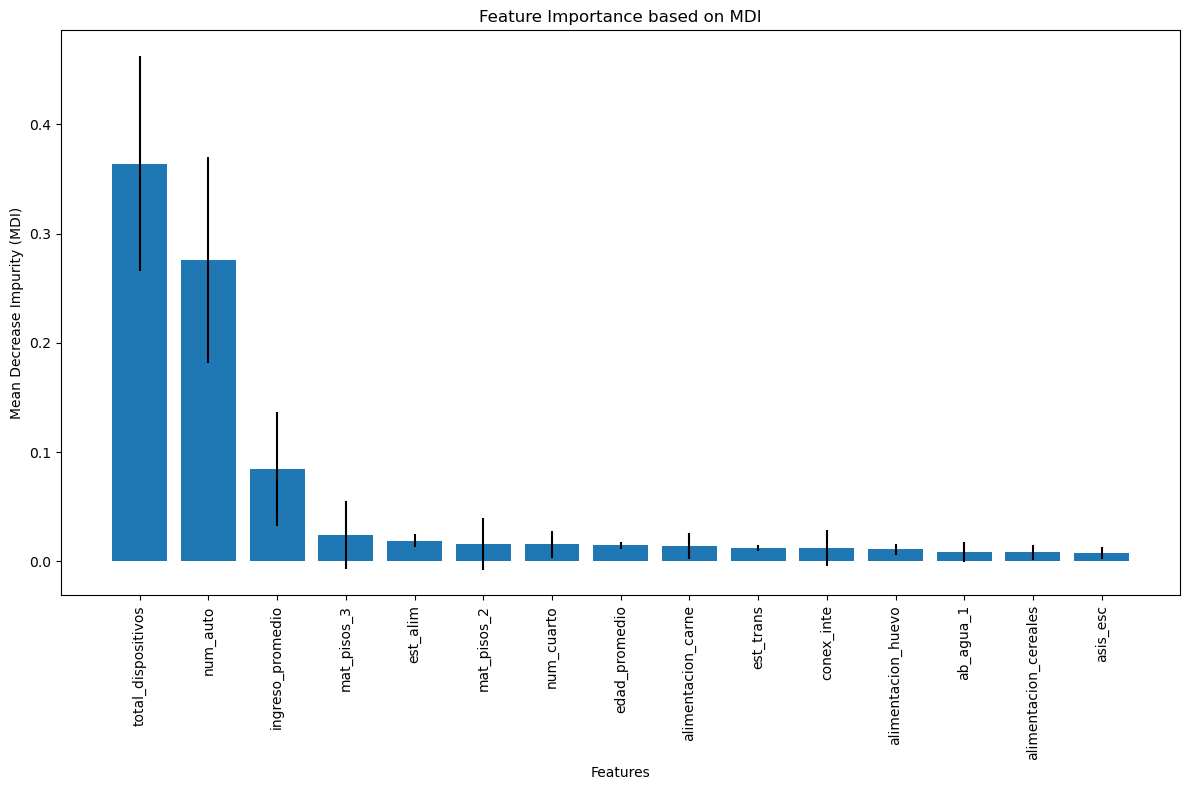

In [8]:
# Define feature importances based on mean decrease in impurity (MDI) with feature_importances_
importances = rf.feature_importances_

# Calculate standard deviation for each feature importance with estimators_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) #rf.estimators_ contain each individual tree

# Crea un DataFrame para ordenar las características
feature_importances_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances,
    'std': std
}).sort_values(by='importance', ascending=False)

# Select top 15 features with highest importance based on importances
top_features = feature_importances_df.head(15)

# Plot feature importances of top 15 features
plt.figure(figsize=(12, 8))
plt.bar(top_features['feature'], top_features['importance'], yerr=top_features['std'])
plt.xlabel('Features')
plt.ylabel('Mean Decrease Impurity (MDI)')
plt.title('Feature Importance based on MDI')
plt.xticks(rotation=90) # Rota las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el diseño para que todo quepa
plt.savefig('feature_importance')

According to the graph, `total_dispositivos`, `num_auto`, `ingreso_promedio`, `mat_pisos_3`, and `est_alim` are feature with the highest MDI. This means all those variables are considered as important features for the random forest classifier. It seems the total number of electronic devices, number of cars, average income per household, type of floor, and average food expenditure define the household conditions according to this classifier. 